<a href="https://colab.research.google.com/github/vishymails/Cybersecurity-june24/blob/main/Cybersecurity_june2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from random import random

In [2]:
time_series = [2 * x + random() for x in range(1, 100)]


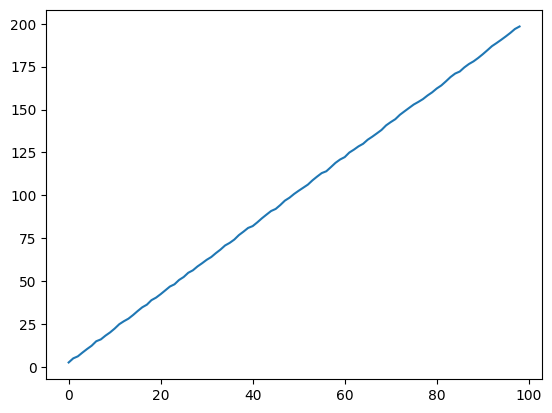

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()


In [16]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order=(0, 1, 2))
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[199.25776731]


In [18]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, lags=2)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)



[200.59113312]


In [19]:
model_fit.summary


<bound method AutoRegResults.summary of <statsmodels.tsa.ar_model.AutoRegResults object at 0x7e4f93607640>>

In [20]:
model_fit.params

array([2.67830625, 0.65050609, 0.34965503])

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                     AutoReg(2)   Log Likelihood                 -41.198
Method:               Conditional MLE   S.D. of innovations              0.370
Date:                Mon, 17 Jun 2024   AIC                             90.396
Time:                        11:02:33   BIC                            100.695
Sample:                             2   HQIC                            94.561
                                   99                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6783      0.205     13.071      0.000       2.277       3.080
y.L1           0.6505      0.096      6.802      0.000       0.463       0.838
y.L2           0.3497      0.096      3.655      0.000       0.162       0.537
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9999           +0.0000j            0.9999            0.0000
AR.2           -2.8603           +0.0000j            2.8603            0.5000
-----------------------------------------------------------------------------
"""